In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyper as pr
from scipy import stats

%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
plt.style.use('dark_background')

In [3]:
r = pr.R(use_numpy='True', use_pandas='True')
r('load("./data.RData")')
data = pd.Series(r.get('data'))

In [5]:
data.describe()

count    50.00000
mean      3.56000
std       1.72804
min       0.00000
25%       2.00000
50%       3.00000
75%       4.75000
max       7.00000
dtype: float64

c:\users\86002444\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


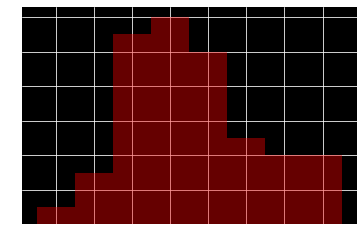

In [14]:
sns.distplot(data, rug=False, kde=False, bins = np.arange(-0.5, 8.5, 1.0), color="red")

In [15]:
print("variance: ", data.var())

variance:  2.986122448979592


In [16]:
print("standard: ", data.std())

standard:  1.728040060004279


In [47]:
x = np.arange(0,10)
prob = pd.Series(stats.poisson.pmf(x,3.56), index=x)

In [48]:
prob

0    0.028439
1    0.101242
2    0.180211
3    0.213851
4    0.190327
5    0.135513
6    0.080404
7    0.040891
8    0.018197
9    0.007198
dtype: float64

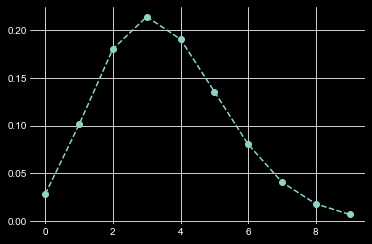

In [36]:
plt.plot(prob, 'o--')

c:\users\86002444\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


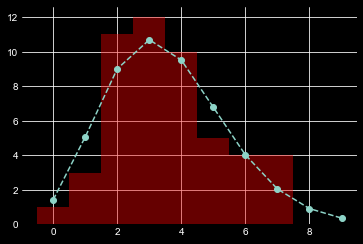

In [38]:
plt.plot(prob*50, 'o--')
sns.distplot(data, rug=False, kde=False, bins = np.arange(-0.5, 8.5, 1.0), color="red")

Text(0,0.5,'prob')

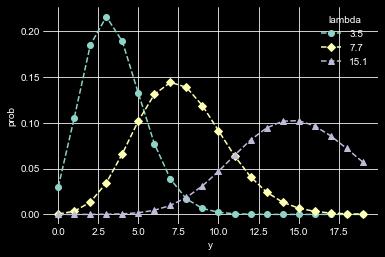

In [50]:
x = np.arange(0, 20)
plt.plot(pd.Series(stats.poisson.pmf(x, 3.5), index=x), 'o--', label=3.5)
plt.plot(pd.Series(stats.poisson.pmf(x, 7.7), index=x), 'D--', label=7.7)
plt.plot(pd.Series(stats.poisson.pmf(x, 15.1), index=x), '^--', label=15.1)
plt.legend(loc='upper right', title='lambda')
plt.xlabel('y')
plt.ylabel('prob')


c:\users\86002444\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


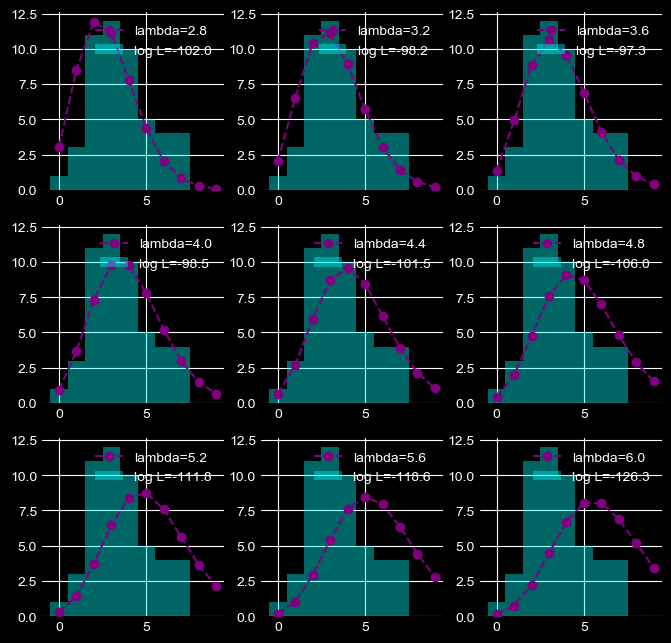

In [97]:
x = np.arange(0, 10)
bins = np.arange(-0.5, 8.5, 1.0)
lam = [round((2.8 + 0.4 * i), 2) for i in range(9)]
fig = plt.figure(figsize=(8,8),dpi=100)

for i in range(len(lam)):
    ax = fig.add_subplot((331+i))
    t_lambda = lam[i]
    prob = pd.Series(stats.poisson.pmf(x,t_lambda), index=x)
    Lf = sum(stats.poisson.logpmf(data, t_lambda))
    ax.plot(prob * 50, 'o--', label='lambda=%.1f' % t_lambda, color='purple')
    sns.distplot(data, rug=False, kde=False, bins = np.arange(-0.5, 8.5, 1.0), color="cyan", 
                 label='log L=%.1f' % Lf)
    ax.legend(loc='upper right', fontsize=10)

In [98]:
x = np.arange(2.0, 5.0, 0.01)
Lf = np.array([ sum(stats.poisson.logpmf(data, i)) for i in x])

Text(0,0.5,'Lf')

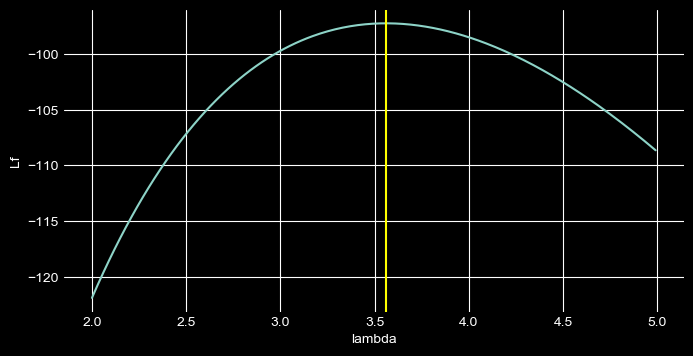

In [107]:
fig = plt.figure(figsize=(8,4),dpi=100)
plt.plot(x, Lf)
plt.axvline(x=x[np.argmax(Lf)], color='yellow')
plt.xlabel('lambda')
plt.ylabel('Lf')